In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/fetal_health.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())
print("\nStatistical Summary:")
print(data.describe().T)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term

<ipython-input-3-802b3e5f894c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="fetal_health", palette=colours)


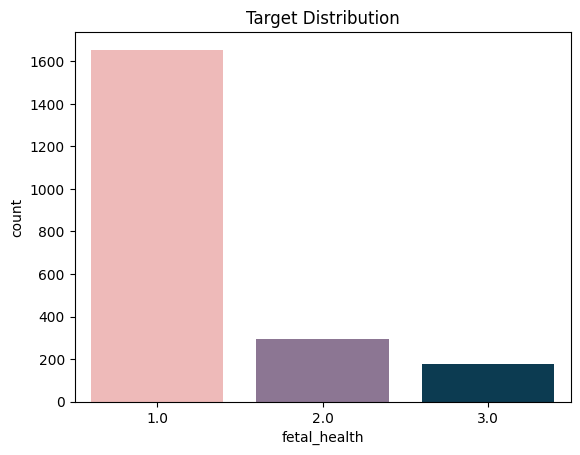

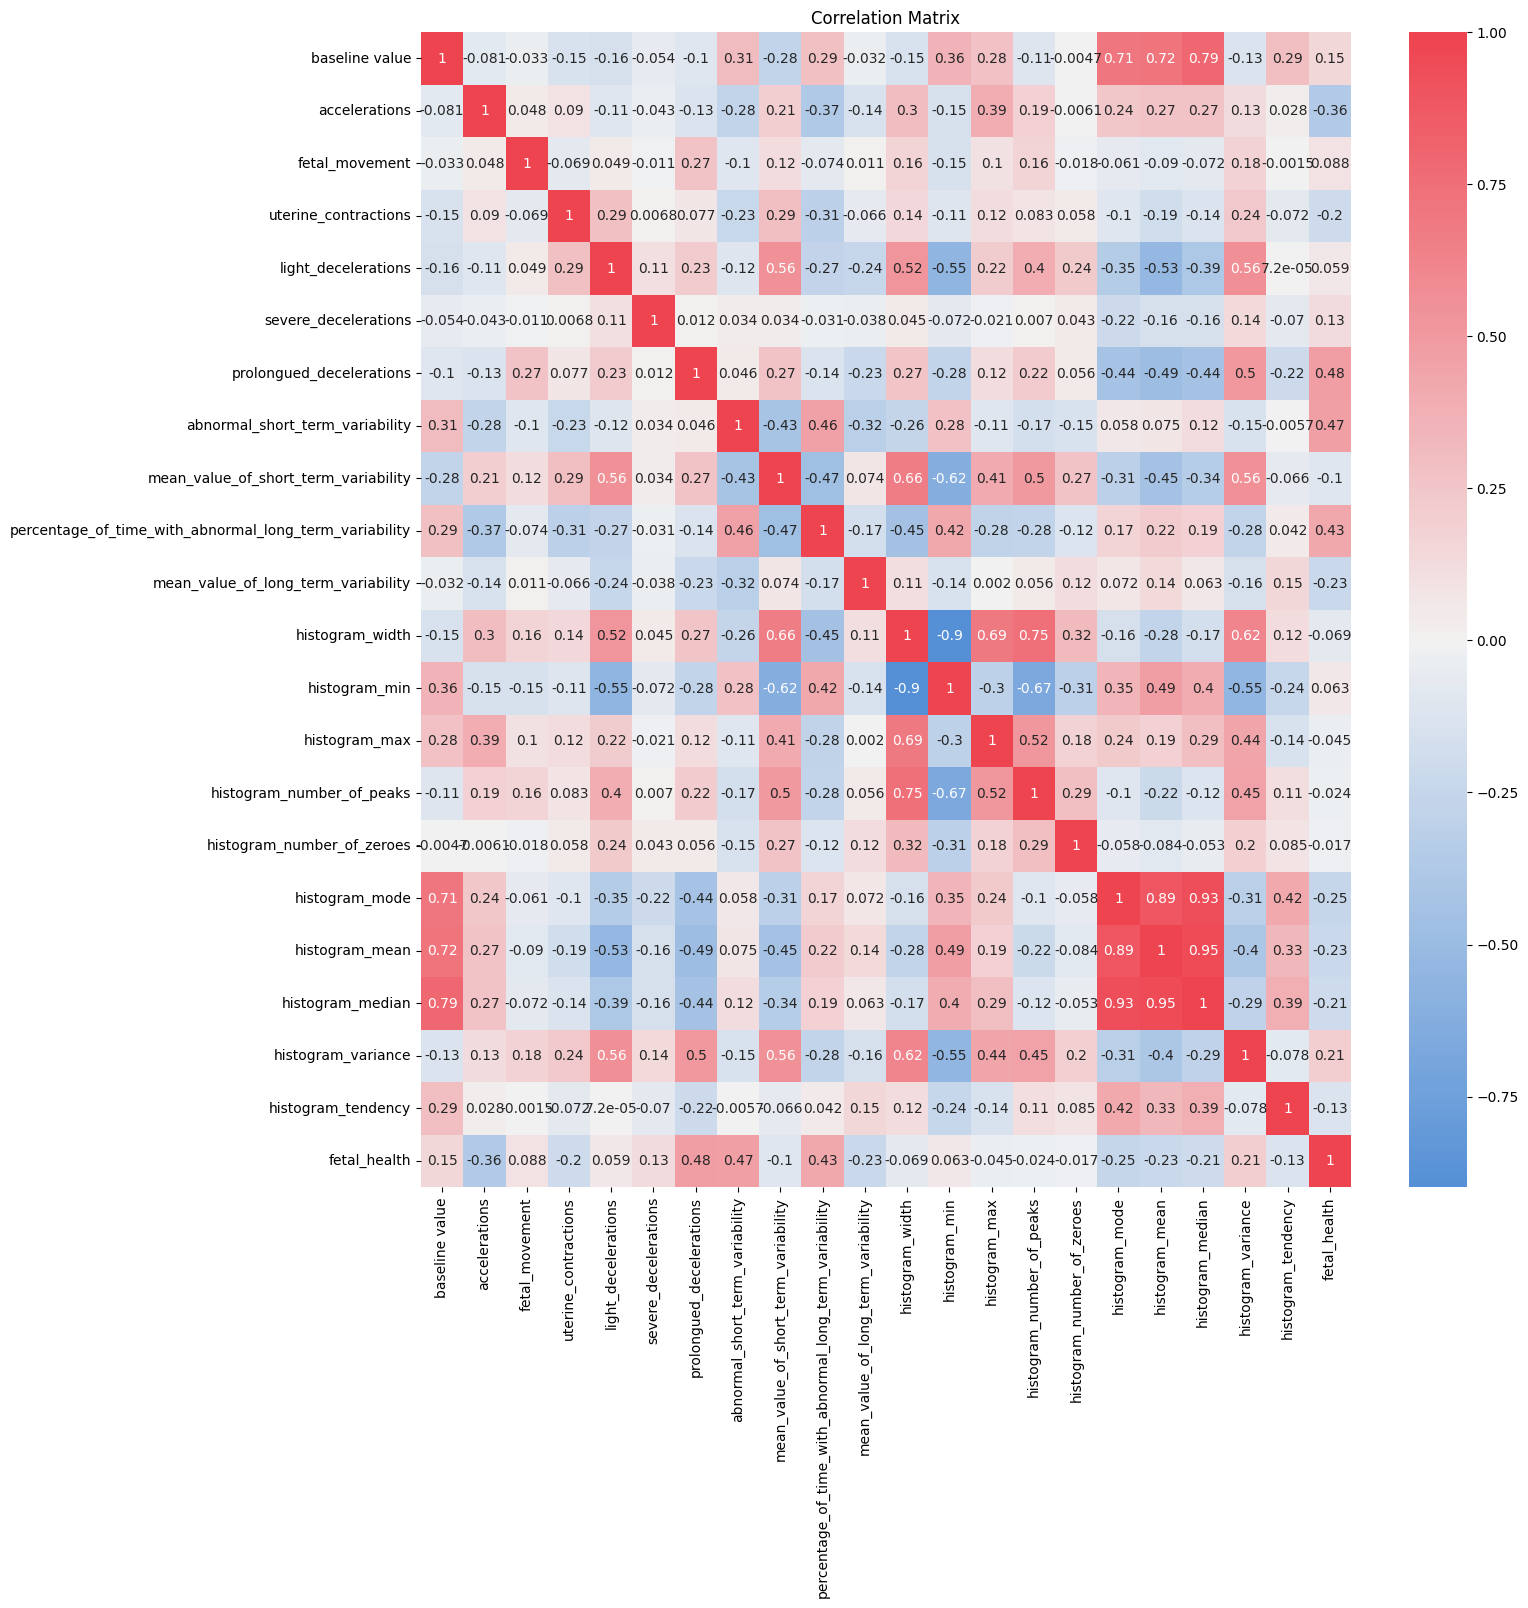

In [ ]:
# Visualize the target distribution to check for imbalance
colours = ["#f7b2b0", "#8f7198", "#003f5c"]
sns.countplot(data=data, x="fetal_health", palette=colours)
plt.title("Target Distribution")
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 15))
corrmat = data.corr()
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)
plt.title("Correlation Matrix")
plt.show()


<ipython-input-9-dac5b64ce3fe>:13: UserWarning: 
The palette list has fewer values (5) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data=X_df, palette=shades)


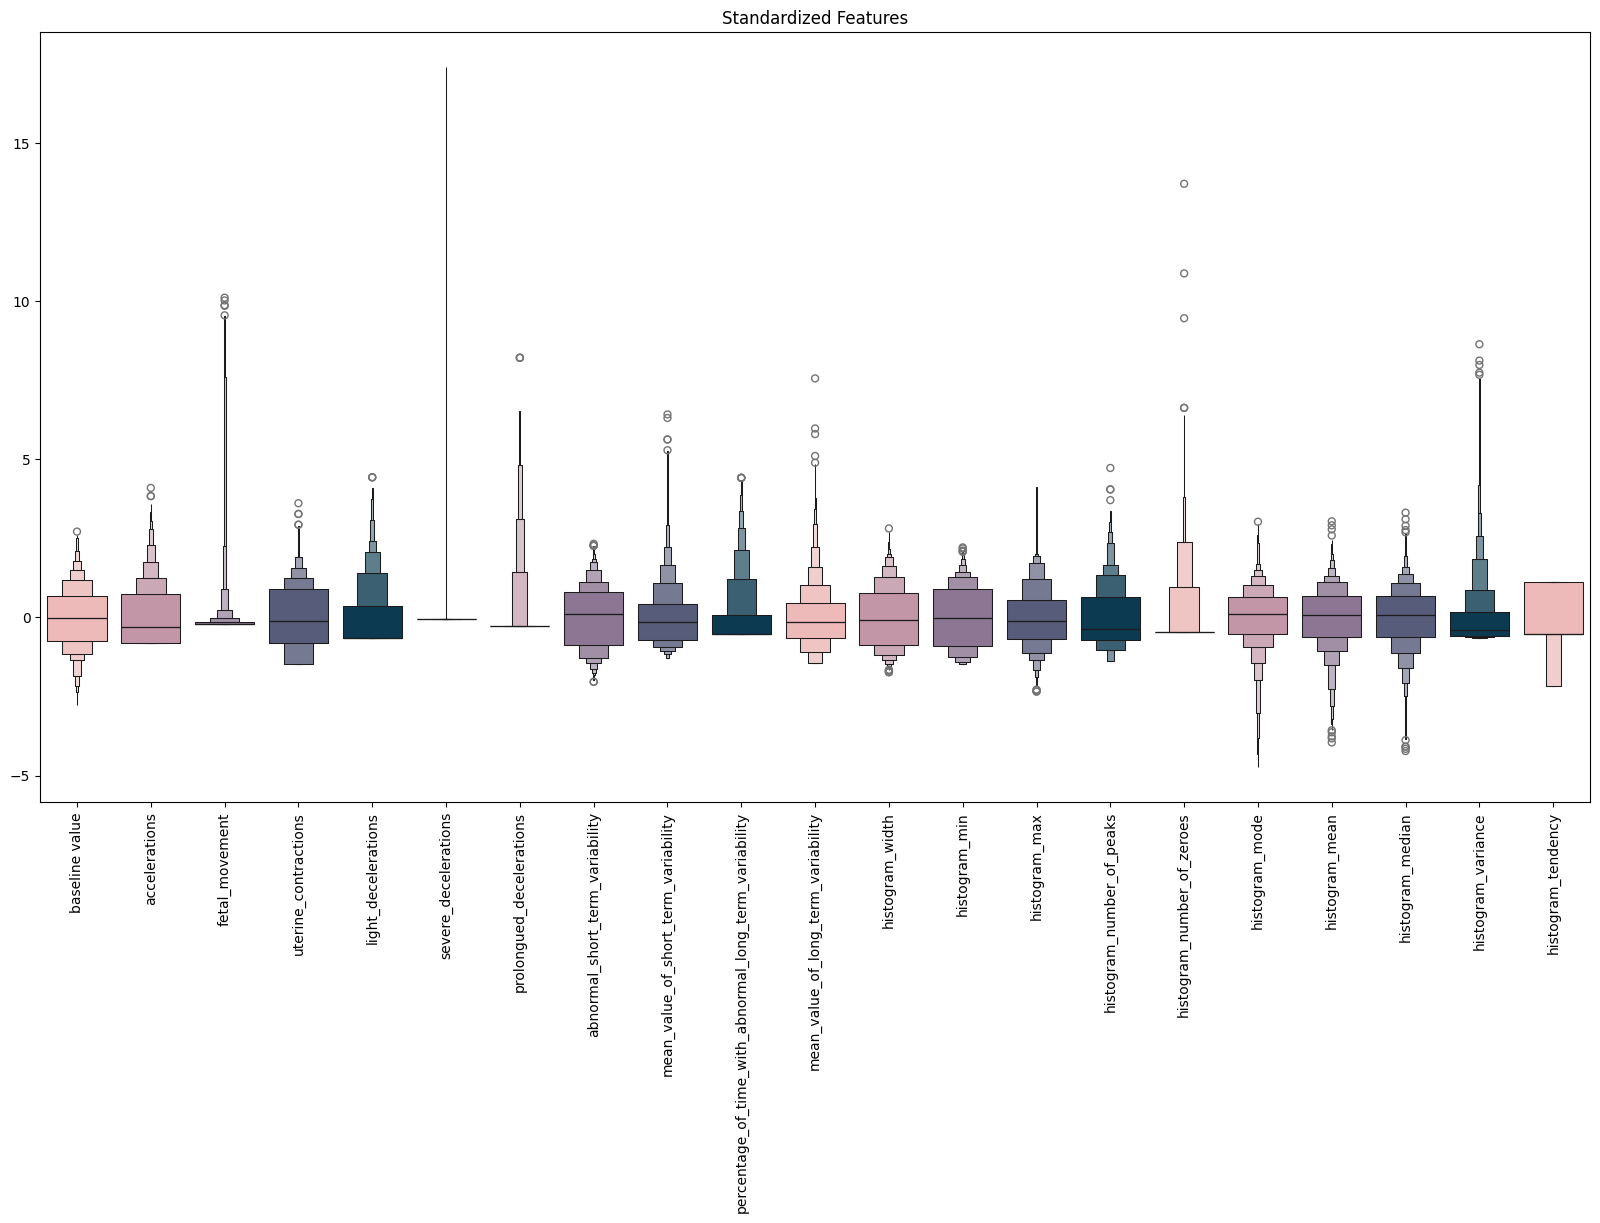

Sample One-Hot Encoded Labels: [[0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
# Assign features to X and target to y
X = data.drop(["fetal_health"], axis=1)
y = data["fetal_health"]

# Standardize features
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=X.columns)

# Visualize standardized features
plt.figure(figsize=(20, 10))
shades = ["#f7b2b0", "#c98ea6", "#8f7198", "#50587f", "#003f5c"]
sns.boxenplot(data=X_df, palette=shades)
plt.xticks(rotation=90)
plt.title("Standardized Features")
plt.show()

# Corrected one-hot encoding (convert to integers)
y_onehot = pd.get_dummies(y).astype(int).values  # Converts boolean to integer
print("Sample One-Hot Encoded Labels:", y_onehot[:5])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)


Training Set Size: (1488, 21)
Test Set Size: (638, 21)


In [ ]:
# Define model pipelines for classification models
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])

# List of all pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for easy reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.938192 
SVC: 0.906594 


In [ ]:
# Evaluate RandomForest model on the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print("Random Forest Test Accuracy:", accuracy)

# Detailed metrics
print(classification_report(y_test, pred_rfc))


Random Forest Test Accuracy: 0.9404388714733543
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.90      0.75      0.82       101
         3.0       0.84      0.93      0.88        41

    accuracy                           0.94       638
   macro avg       0.90      0.89      0.89       638
weighted avg       0.94      0.94      0.94       638



In [ ]:
# Set up parameter grid for GridSearchCV
parameters = {
    'n_estimators': [100, 150, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 12],
    'criterion': ['gini', 'entropy'],
    'n_jobs': [-1]
}

# Perform GridSearchCV to find best parameters
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5)
CV_rfc.fit(X_train, y_train)

# Display the best parameters found
print("Best Parameters from GridSearch:", CV_rfc.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters from GridSearch: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1}


In [ ]:
# Train the best model from GridSearchCV
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)

# Test the model on the test set
predictions = RF_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("********* Optimized Random Forest Results *********")
print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1)
print(classification_report(y_test, predictions))


********* Optimized Random Forest Results *********
Accuracy    :  0.9435736677115988
Recall      :  0.9435736677115988
Precision   :  0.9424668600639036
F1 Score    :  0.9418677180750391
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.91      0.76      0.83       101
         3.0       0.90      0.93      0.92        41

    accuracy                           0.94       638
   macro avg       0.92      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



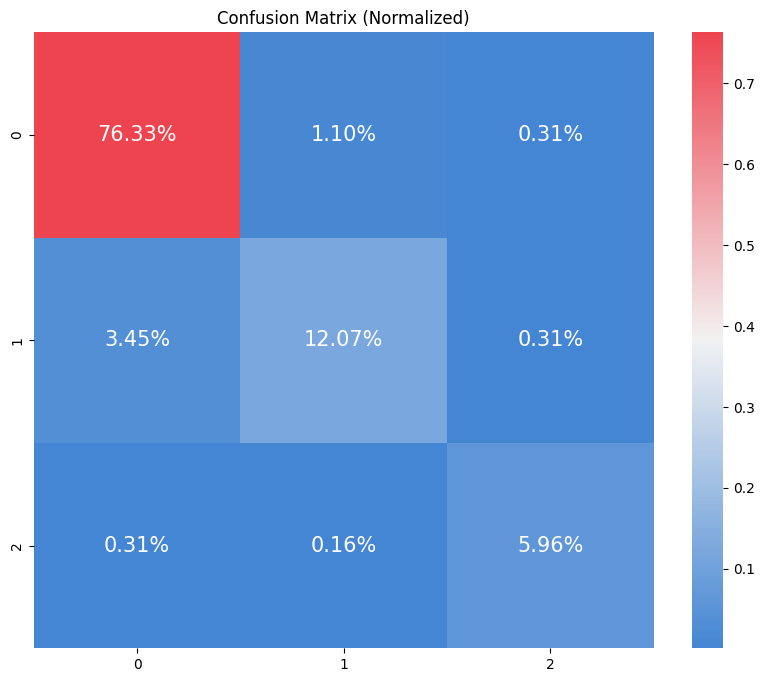

In [ ]:
# Confusion matrix
plt.figure(figsize=(10, 8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap=cmap, annot=True, annot_kws={'size': 15}, fmt=".2%")
plt.title("Confusion Matrix (Normalized)")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import joblib

# Save the CTG model
ctg_model_path = '/content/drive/MyDrive/MLSA BUP/ctg_model.joblib'
joblib.dump(RF_model, ctg_model_path)  # Saves the model to a .joblib file
print("CTG model saved to:", ctg_model_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CTG model saved to: /content/drive/MyDrive/MLSA BUP/ctg_model.joblib
